### Loading DeepPurpose

In [ ]:
!pip install git+https://github.com/yazdanimehdi/DeepPurpose
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
!pip install git+https://github.com/bp-kelley/descriptastorus

In [ ]:
import rdkit
import DeepPurpose

In [ ]:
from DeepPurpose import DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

### Loading BindingDB

In [ ]:
import os
os.chdir('../')

In [ ]:
def download_BindingDB_edited(path = './data'):

	print('Beginning to download dataset...')

	if not os.path.exists(path):
	    os.makedirs(path)

	url = 'https://www.bindingdb.org/bind/downloads/BindingDB_All_2021m4.tsv.zip'
	saved_path = wget.download(url, path)

	print('Beginning to extract zip file...')
	with ZipFile(saved_path, 'r') as zip:
	    zip.extractall(path = path)
	    print('Done!')
	path = path + '/BindingDB_All.tsv'
	return path

In [ ]:
X_drug, X_target, y  = process_BindingDB(download_BindingDB_edited('../data/BindingDB_All.tsv'),
					 y = 'IC50', 
					 binary = True, 
					 convert_to_log = False,
           threshold=30)

### Morgan-AAC

In [ ]:
drug_encoding, target_encoding = 'Morgan', 'AAC'

In [ ]:
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random', 
                                frac=[0.7,0.1,0.2],
                                random_seed=1)

Drug Target Interaction Prediction Mode...
in total: 1309264 drug-target pairs
encoding drug...
unique drugs: 650166
rdkit not found this smiles for morgan: CC(C)(C)OC(=O)N1CC(=O)N(C(=O)C1)c1ccc(cc1)N1CC(COC(=O)[N]2=CC=C(Cl)S2)OC1=O convert to all 0 features
rdkit not found this smiles for morgan: CSc1ccc(cc1)C1=C(C=C[N]([O-])=C1)[C@@H]1CCC(F)(F)C[C@H]1C(=O)NCC#N convert to all 0 features
rdkit not found this smiles for morgan: O=C1NC(=O)c2c1c1c3ccccc3n3[Ru](C#[O])[n+]4cccc2c4c13 convert to all 0 features
rdkit not found this smiles for morgan: CN1C(=O)c2c(C1=O)c1cc(F)c[n+]3[Ru](C#[O])n4c5ccc(O)cc5c2c4c13 convert to all 0 features
rdkit not found this smiles for morgan: NOOSc1ccc(CC[N]23CC4=CC=CC=[N]4[Re+]2[N]2=C(C3)C=CC=C2)cc1 convert to all 0 features
rdkit not found this smiles for morgan: NOOSc1ccc(CC[N@@]23CC(=O)O[Re]2[N]2=C(C3)C=CC=C2)cc1 convert to all 0 features
rdkit not found this smiles for morgan: CN1C=C[N]2=C1C[N]1(CCc3ccc(SOON)cc3)CC3=[N](C=CN3C)[Re+]21 convert to all 0 f

In [ ]:
config = generate_config(drug_encoding, 
                         target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 30, 
                         LR = 0.001, 
                         batch_size = 256)

In [ ]:
net = models.model_initialize(**config)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.70376. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 0.50161. Total time 0.00805 hours
Training at Epoch 1 iteration 200 with loss 0.46846. Total time 0.01638 hours
Training at Epoch 1 iteration 300 with loss 0.44609. Total time 0.02444 hours
Training at Epoch 1 iteration 400 with loss 0.43659. Total time 0.0325 hours
Training at Epoch 1 iteration 500 with loss 0.38783. Total time 0.04083 hours
Training at Epoch 1 iteration 600 with loss 0.46036. Total time 0.04916 hours
Training at Epoch 1 iteration 700 with loss 0.39047. Total time 0.05722 hours
Training at Epoch 1 iteration 800 with loss 0.41074. Total time 0.06527 hours
Training at Epoch 1 iteration 900 with loss 0.35109. Total time 0.07361 hours
Training at Epoch 1 iteration 1000 with loss 0.37992. Total time 0.08166 hours
Training at Epoch 1 iteration 1100 with loss 0.35616. Total time 0.09 hours
Traini

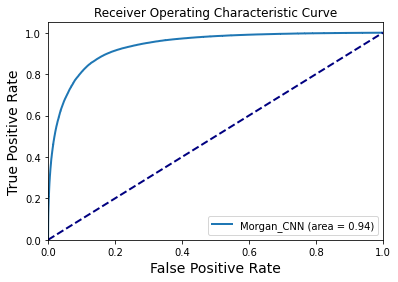

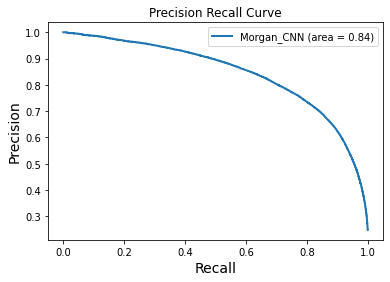

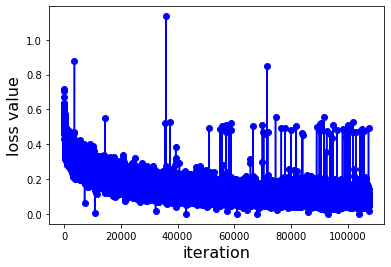

In [ ]:
net.train(train, val, test)

In [ ]:
net.save_model('/content/drive/MyDrive/Morgan_AAC')

### Loading BindingDB

In [ ]:
import os
os.chdir('../')

In [ ]:
def download_BindingDB_edited(path = './data'):

	print('Beginning to download dataset...')

	if not os.path.exists(path):
	    os.makedirs(path)

	url = 'https://www.bindingdb.org/bind/downloads/BindingDB_All_2021m4.tsv.zip'
	saved_path = wget.download(url, path)

	print('Beginning to extract zip file...')
	with ZipFile(saved_path, 'r') as zip:
	    zip.extractall(path = path)
	    print('Done!')
	path = path + '/BindingDB_All.tsv'
	return path

In [ ]:
X_drug, X_target, y  = process_BindingDB(download_BindingDB_edited('../data/BindingDB_All.tsv'),
					 y = 'IC50', 
					 binary = True, 
					 convert_to_log = False,
           threshold=30)

### CNN-CNN

In [ ]:
drug_encoding, target_encoding = 'CNN', 'CNN'

In [ ]:
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random', 
                                frac=[0.7,0.1,0.2],
                                random_seed=1)

Drug Target Interaction Prediction Mode...
in total: 1309264 drug-target pairs
encoding drug...
unique drugs: 650166
encoding protein...
unique target sequence: 5789
splitting dataset...
Done.


In [ ]:
config = generate_config(drug_encoding, 
                         target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 30, 
                         LR = 0.001, 
                         batch_size = 256)

In [ ]:
net = models.model_initialize(**config)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69559. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 0.50111. Total time 0.01194 hours
Training at Epoch 1 iteration 200 with loss 0.57017. Total time 0.02361 hours
Training at Epoch 1 iteration 300 with loss 0.43401. Total time 0.03555 hours
Training at Epoch 1 iteration 400 with loss 0.46720. Total time 0.04722 hours
Training at Epoch 1 iteration 500 with loss 0.42075. Total time 0.05916 hours
Training at Epoch 1 iteration 600 with loss 0.41822. Total time 0.07083 hours
Training at Epoch 1 iteration 700 with loss 0.39700. Total time 0.08277 hours
Training at Epoch 1 iteration 800 with loss 0.54949. Total time 0.09444 hours
Training at Epoch 1 iteration 900 with loss 0.41839. Total time 0.10638 hours
Training at Epoch 1 iteration 1000 with loss 0.46206. Total time 0.11833 hours
Training at Epoch 1 iteration 1100 with loss 0.47110. Total time 0.13027 hours
Tr

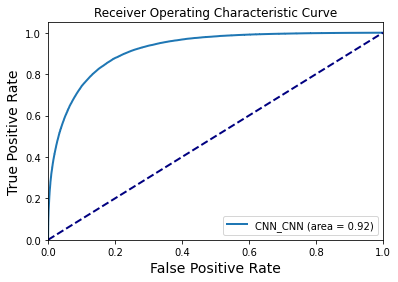

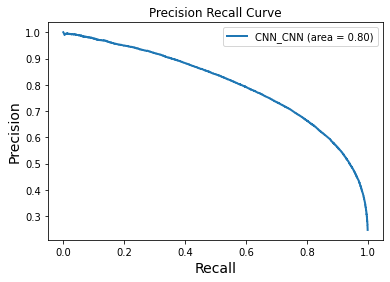

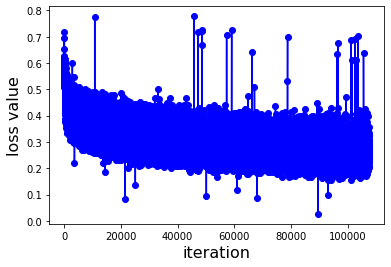

In [ ]:
net.train(train, val, test)

In [ ]:
net.save_model('/content/drive/MyDrive/CNN-CNN')

### Loading BindingDB

In [ ]:
import os
os.chdir('../')

In [ ]:
def download_BindingDB_edited(path = './data'):

	print('Beginning to download dataset...')

	if not os.path.exists(path):
	    os.makedirs(path)

	url = 'https://www.bindingdb.org/bind/downloads/BindingDB_All_2021m4.tsv.zip'
	saved_path = wget.download(url, path)

	print('Beginning to extract zip file...')
	with ZipFile(saved_path, 'r') as zip:
	    zip.extractall(path = path)
	    print('Done!')
	path = path + '/BindingDB_All.tsv'
	return path

In [ ]:
X_drug, X_target, y  = process_BindingDB(download_BindingDB_edited('../data/BindingDB_All.tsv'),
					 y = 'IC50', 
					 binary = True, 
					 convert_to_log = False,
           threshold=30)

### Morgan-CNN

In [ ]:
drug_encoding, target_encoding = 'Morgan', 'CNN'

In [ ]:
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random', 
                                frac=[0.7,0.1,0.2],
                                random_seed=1)

In [ ]:
config = generate_config(drug_encoding, 
                         target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 30, 
                         LR = 0.001, 
                         batch_size = 256)

In [ ]:
net = models.model_initialize(**config)

In [ ]:
net.train(train, val, test)

In [ ]:
net.save_model('/content/drive/MyDrive/Morgan-CNN')

### if you need to save the predictions, instead of using line  $net = models.model\_initialize(**config)$ use code below:


In [ ]:
import pickle 

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils import data
from torch.utils.data import SequentialSampler
from torch import nn 

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import mean_squared_error, roc_auc_score, average_precision_score, f1_score, log_loss
from lifelines.utils import concordance_index
from scipy.stats import pearsonr
import pickle 
torch.manual_seed(2)
np.random.seed(3)
import copy
from prettytable import PrettyTable

import os

from DeepPurpose.utils import *
from DeepPurpose.model_helper import Encoder_MultipleLayers, Embeddings        
from DeepPurpose.encoders import *

from torch.utils.tensorboard import SummaryWriter

class Classifier(nn.Sequential):
	def __init__(self, model_drug, model_protein, **config):
		super(Classifier, self).__init__()
		self.input_dim_drug = config['hidden_dim_drug']
		self.input_dim_protein = config['hidden_dim_protein']

		self.model_drug = model_drug
		self.model_protein = model_protein

		self.dropout = nn.Dropout(0.1)

		self.hidden_dims = config['cls_hidden_dims']
		layer_size = len(self.hidden_dims) + 1
		dims = [self.input_dim_drug + self.input_dim_protein] + self.hidden_dims + [1]
		
		self.predictor = nn.ModuleList([nn.Linear(dims[i], dims[i+1]) for i in range(layer_size)])

	def forward(self, v_D, v_P):
		# each encoding
		v_D = self.model_drug(v_D)
		v_P = self.model_protein(v_P)
		# concatenate and classify
		v_f = torch.cat((v_D, v_P), 1)
		for i, l in enumerate(self.predictor):
			if i==(len(self.predictor)-1):
				v_f = l(v_f)
			else:
				v_f = F.relu(self.dropout(l(v_f)))
		return v_f

def model_initialize(**config):
	model = DBTA(**config)
	return model

def model_pretrained(path_dir = None, model = None):
	if model is not None:
		path_dir = download_pretrained_model(model)
	config = load_dict(path_dir)
	model = DBTA(**config)
	model.load_pretrained(path_dir + '/model.pt')    
	return model

def repurpose(X_repurpose, target, model, drug_names = None, target_name = None, 
			  result_folder = "./result/", convert_y = False, output_num_max = 10, verbose = True):
	# X_repurpose: a list of SMILES string
	# target: one target 
	
	fo = os.path.join(result_folder, "repurposing.txt")
	print_list = []
	with open(fo, 'w') as fout:
		print('repurposing...')
		df_data = data_process_repurpose_virtual_screening(X_repurpose, target, model.drug_encoding, model.target_encoding, 'repurposing')
		y_pred = model.predict(df_data)

		if convert_y:
			y_pred = convert_y_unit(np.array(y_pred), 'p', 'nM')

		print('---------------')
		if target_name is not None:
			if verbose:
				print('Drug Repurposing Result for '+target_name)
		if model.binary:
			table_header = ["Rank", "Drug Name", "Target Name", "Interaction", "Probability"]
		else:
			### regression 
			table_header = ["Rank", "Drug Name", "Target Name", "Binding Score"]
		table = PrettyTable(table_header)
		if drug_names is None:
			drug_names = ['Drug ' + str(i) for i in list(range(len(X_repurpose)))]
		if target_name is None:
			target_name = 'Target' 
		if drug_names is not None:
			f_d = max([len(o) for o in drug_names]) + 1
			for i in range(len(X_repurpose)):
				if model.binary:
					if y_pred[i] > 0.5:
						string_lst = [drug_names[i], target_name, "YES", "{0:.2f}".format(y_pred[i])]
						
					else:
						string_lst = [drug_names[i], target_name, "NO", "{0:.2f}".format(y_pred[i])]
				else:
					#### regression 
					#### Rank, Drug Name, Target Name, binding score 
					string_lst = [drug_names[i], target_name, "{0:.2f}".format(y_pred[i])]
					string = 'Drug ' + '{:<{f_d}}'.format(drug_names[i], f_d =f_d) + \
						' predicted to have binding affinity score ' + "{0:.2f}".format(y_pred[i])
					#print_list.append((string, y_pred[i]))
				print_list.append((string_lst, y_pred[i]))
		
		if convert_y:
			print_list.sort(key = lambda x:x[1])
		else:
			print_list.sort(key = lambda x:x[1], reverse = True)

		print_list = [i[0] for i in print_list]
		for idx, lst in enumerate(print_list):
			lst = [str(idx + 1)] + lst 
			table.add_row(lst)
		fout.write(table.get_string())
	if verbose:
		with open(fo, 'r') as fin:
			lines = fin.readlines()
			for idx, line in enumerate(lines):
				if idx < 13:
					print(line, end = '')
				else:
					print('checkout ' + fo + ' for the whole list')
					break
	return y_pred

def virtual_screening(X_repurpose, target, model, drug_names = None, target_names = None,
					  result_folder = "./result/", convert_y = False, output_num_max = 10, verbose = True):
	# X_repurpose: a list of SMILES string
	# target: a list of targets
	if isinstance(target, str):
		target = [target]
	
	fo = os.path.join(result_folder, "virtual_screening.txt")
	#if not model.binary:
	#	print_list = []
	print_list = []
	if drug_names is None:
		drug_names = ['Drug ' + str(i) for i in list(range(len(X_repurpose)))]
	if target_names is None:
		target_names = ['Target ' + str(i) for i in list(range(len(target)))]   
	if model.binary:
		table_header = ["Rank", "Drug Name", "Target Name", "Interaction", "Probability"]
	else:
		### regression 
		table_header = ["Rank", "Drug Name", "Target Name", "Binding Score"]
	table = PrettyTable(table_header)

	with open(fo,'w') as fout:
		print('virtual screening...')
		df_data = data_process_repurpose_virtual_screening(X_repurpose, target, \
														   model.drug_encoding, model.target_encoding, 'virtual screening')
		y_pred = model.predict(df_data)

		if convert_y:
			y_pred = convert_y_unit(np.array(y_pred), 'p', 'nM')

		print('---------------')
		if drug_names is not None and target_names is not None:
			if verbose:
				print('Virtual Screening Result')
			f_d = max([len(o) for o in drug_names]) + 1
			f_p = max([len(o) for o in target_names]) + 1
			for i in range(len(target)):
				if model.binary:
					if y_pred[i] > 0.5:
						string_lst = [drug_names[i], target_names[i], "YES", "{0:.2f}".format(y_pred[i])]						
						
					else:
						string_lst = [drug_names[i], target_names[i], "NO", "{0:.2f}".format(y_pred[i])]
						
				else:
					### regression 
					string_lst = [drug_names[i], target_names[i], "{0:.2f}".format(y_pred[i])]
					
				print_list.append((string_lst, y_pred[i]))
		if convert_y:
			print_list.sort(key = lambda x:x[1])
		else:
			print_list.sort(key = lambda x:x[1], reverse = True)
		print_list = [i[0] for i in print_list]
		for idx, lst in enumerate(print_list):
			lst = [str(idx+1)] + lst
			table.add_row(lst)
		fout.write(table.get_string())

	if verbose:
		with open(fo, 'r') as fin:
			lines = fin.readlines()
			for idx, line in enumerate(lines):
				if idx < 13:
					print(line, end = '')
				else:
					print('checkout ' + fo + ' for the whole list')
					break
		print()

	return y_pred

def dgl_collate_func(x):
	d, p, y = zip(*x)
	import dgl
	d = dgl.batch(d)
	return d, torch.tensor(p), torch.tensor(y)

class DBTA:
	'''
		Drug Target Binding Affinity 
	'''

	def __init__(self, **config):
		drug_encoding = config['drug_encoding']
		target_encoding = config['target_encoding']

		if drug_encoding == 'Morgan' or drug_encoding == 'ErG' or drug_encoding=='Pubchem' or drug_encoding=='Daylight' or drug_encoding=='rdkit_2d_normalized' or drug_encoding == 'ESPF':
			# Future TODO: support multiple encoding scheme for static input 
			self.model_drug = MLP(config['input_dim_drug'], config['hidden_dim_drug'], config['mlp_hidden_dims_drug'])
		elif drug_encoding == 'CNN':
			self.model_drug = CNN('drug', **config)
		elif drug_encoding == 'CNN_RNN':
			self.model_drug = CNN_RNN('drug', **config)
		elif drug_encoding == 'Transformer':
			self.model_drug = transformer('drug', **config)
		elif drug_encoding == 'MPNN':
			self.model_drug = MPNN(config['hidden_dim_drug'], config['mpnn_depth'])
		elif drug_encoding == 'DGL_GCN':
			self.model_drug = DGL_GCN(in_feats = 74, 
									hidden_feats = [config['gnn_hid_dim_drug']] * config['gnn_num_layers'], 
									activation = [config['gnn_activation']] * config['gnn_num_layers'], 
									predictor_dim = config['hidden_dim_drug'])
		elif drug_encoding == 'DGL_NeuralFP':
			self.model_drug = DGL_NeuralFP(in_feats = 74, 
									hidden_feats = [config['gnn_hid_dim_drug']] * config['gnn_num_layers'], 
									max_degree = config['neuralfp_max_degree'],
									activation = [config['gnn_activation']] * config['gnn_num_layers'], 
									predictor_hidden_size = config['neuralfp_predictor_hid_dim'],
									predictor_dim = config['hidden_dim_drug'],
									predictor_activation = config['neuralfp_predictor_activation'])
		elif drug_encoding == 'DGL_GIN_AttrMasking':
			self.model_drug = DGL_GIN_AttrMasking(predictor_dim = config['hidden_dim_drug'])
		elif drug_encoding == 'DGL_GIN_ContextPred':
			self.model_drug = DGL_GIN_ContextPred(predictor_dim = config['hidden_dim_drug'])
		elif drug_encoding == 'DGL_AttentiveFP':
			self.model_drug = DGL_AttentiveFP(node_feat_size = 39, 
											edge_feat_size = 11,  
											num_layers = config['gnn_num_layers'], 
											num_timesteps = config['attentivefp_num_timesteps'], 
											graph_feat_size = config['gnn_hid_dim_drug'], 
											predictor_dim = config['hidden_dim_drug'])
		else:
			raise AttributeError('Please use one of the available encoding method.')

		if target_encoding == 'AAC' or target_encoding == 'PseudoAAC' or  target_encoding == 'Conjoint_triad' or target_encoding == 'Quasi-seq' or target_encoding == 'ESPF':
			self.model_protein = MLP(config['input_dim_protein'], config['hidden_dim_protein'], config['mlp_hidden_dims_target'])
		elif target_encoding == 'CNN':
			self.model_protein = CNN('protein', **config)
		elif target_encoding == 'CNN_RNN':
			self.model_protein = CNN_RNN('protein', **config)
		elif target_encoding == 'Transformer':
			self.model_protein = transformer('protein', **config)
		else:
			raise AttributeError('Please use one of the available encoding method.')

		self.model = Classifier(self.model_drug, self.model_protein, **config)
		self.config = config

		if 'cuda_id' in self.config:
			if self.config['cuda_id'] is None:
				self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
			else:
				self.device = torch.device('cuda:' + str(self.config['cuda_id']) if torch.cuda.is_available() else 'cpu')
		else:
			self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
		
		self.drug_encoding = drug_encoding
		self.target_encoding = target_encoding
		self.result_folder = config['result_folder']
		if not os.path.exists(self.result_folder):
			os.mkdir(self.result_folder)            
		self.binary = False
		if 'num_workers' not in self.config.keys():
			self.config['num_workers'] = 0
		if 'decay' not in self.config.keys():
			self.config['decay'] = 0

	def test_(self, data_generator, model, repurposing_mode = False, test = False):
		y_pred = []
		y_label = []
		model.eval()
		for i, (v_d, v_p, label) in enumerate(data_generator):
			if self.drug_encoding in ["MPNN", 'Transformer', 'DGL_GCN', 'DGL_NeuralFP', 'DGL_GIN_AttrMasking', 'DGL_GIN_ContextPred', 'DGL_AttentiveFP']:
				v_d = v_d
			else:
				v_d = v_d.float().to(self.device)                
			if self.target_encoding == 'Transformer':
				v_p = v_p
			else:
				v_p = v_p.float().to(self.device)                
			score = self.model(v_d, v_p)
			if self.binary:
				m = torch.nn.Sigmoid()
				logits = torch.squeeze(m(score)).detach().cpu().numpy()
			else:
				loss_fct = torch.nn.MSELoss()
				n = torch.squeeze(score, 1)
				loss = loss_fct(n, Variable(torch.from_numpy(np.array(label)).float()).to(self.device))
				logits = torch.squeeze(score).detach().cpu().numpy()
			label_ids = label.to('cpu').numpy()
			y_label = y_label + label_ids.flatten().tolist()
			y_pred = y_pred + logits.flatten().tolist()
			outputs = np.asarray([1 if i else 0 for i in (np.asarray(y_pred) >= 0.5)])
		model.train()
		if self.binary:
			if repurposing_mode:
				return y_pred
			## ROC-AUC curve
			if test:
				roc_auc_file = os.path.join(self.result_folder, "roc-auc.jpg")
				plt.figure(0)
				roc_curve(y_pred, y_label, roc_auc_file, self.drug_encoding + '_' + self.target_encoding)
				plt.figure(1)
				pr_auc_file = os.path.join(self.result_folder, "pr-auc.jpg")
				prauc_curve(y_pred, y_label, pr_auc_file, self.drug_encoding + '_' + self.target_encoding)
				print("aida test")
				pickle.dump(y_pred,open("/content/drive/MyDrive/y_pred_saving.p","wb"))
				pickle.dump(y_label,open("/content/drive/MyDrive/y_label_saving.p","wb"))

			return roc_auc_score(y_label, y_pred), average_precision_score(y_label, y_pred), f1_score(y_label, outputs), log_loss(y_label, outputs), y_pred
		else:
			if repurposing_mode:
				return y_pred
			return mean_squared_error(y_label, y_pred), pearsonr(y_label, y_pred)[0], pearsonr(y_label, y_pred)[1], concordance_index(y_label, y_pred), y_pred, loss

	def train(self, train, val = None, test = None, verbose = True):
		if len(train.Label.unique()) == 2:
			self.binary = True
			self.config['binary'] = True

		lr = self.config['LR']
		decay = self.config['decay']
		BATCH_SIZE = self.config['batch_size']
		train_epoch = self.config['train_epoch']
		if 'test_every_X_epoch' in self.config.keys():
			test_every_X_epoch = self.config['test_every_X_epoch']
		else:     
			test_every_X_epoch = 40
		loss_history = []

		self.model = self.model.to(self.device)

		# support multiple GPUs
		if torch.cuda.device_count() > 1:
			if verbose:
				print("Let's use " + str(torch.cuda.device_count()) + " GPUs!")
			self.model = nn.DataParallel(self.model, dim = 0)
		elif torch.cuda.device_count() == 1:
			if verbose:
				print("Let's use " + str(torch.cuda.device_count()) + " GPU!")
		else:
			if verbose:
				print("Let's use CPU/s!")
		# Future TODO: support multiple optimizers with parameters
		opt = torch.optim.Adam(self.model.parameters(), lr = lr, weight_decay = decay)
		if verbose:
			print('--- Data Preparation ---')

		params = {'batch_size': BATCH_SIZE,
	    		'shuffle': True,
	    		'num_workers': self.config['num_workers'],
	    		'drop_last': False}
		if (self.drug_encoding == "MPNN"):
			params['collate_fn'] = mpnn_collate_func
		elif self.drug_encoding in ['DGL_GCN', 'DGL_NeuralFP', 'DGL_GIN_AttrMasking', 'DGL_GIN_ContextPred', 'DGL_AttentiveFP']:
			params['collate_fn'] = dgl_collate_func

		training_generator = data.DataLoader(data_process_loader(train.index.values, train.Label.values, train, **self.config), **params)
		if val is not None:
			validation_generator = data.DataLoader(data_process_loader(val.index.values, val.Label.values, val, **self.config), **params)
		
		if test is not None:
			info = data_process_loader(test.index.values, test.Label.values, test, **self.config)
			params_test = {'batch_size': BATCH_SIZE,
					'shuffle': False,
					'num_workers': self.config['num_workers'],
					'drop_last': False,
					'sampler':SequentialSampler(info)}
        
			if (self.drug_encoding == "MPNN"):
				params_test['collate_fn'] = mpnn_collate_func
			elif self.drug_encoding in ['DGL_GCN', 'DGL_NeuralFP', 'DGL_GIN_AttrMasking', 'DGL_GIN_ContextPred', 'DGL_AttentiveFP']:
				params_test['collate_fn'] = dgl_collate_func
			testing_generator = data.DataLoader(data_process_loader(test.index.values, test.Label.values, test, **self.config), **params_test)

		# early stopping
		if self.binary:
			max_auc = 0
		else:
			max_MSE = 10000
		model_max = copy.deepcopy(self.model)

		valid_metric_record = []
		valid_metric_header = ["# epoch"] 
		if self.binary:
			valid_metric_header.extend(["AUROC", "AUPRC", "F1"])
		else:
			valid_metric_header.extend(["MSE", "Pearson Correlation", "with p-value", "Concordance Index"])
		table = PrettyTable(valid_metric_header)
		float2str = lambda x:'%0.4f'%x
		if verbose:
			print('--- Go for Training ---')
		writer = SummaryWriter()
		t_start = time() 
		iteration_loss = 0
		for epo in range(train_epoch):
			for i, (v_d, v_p, label) in enumerate(training_generator):
				if self.target_encoding == 'Transformer':
					v_p = v_p
				else:
					v_p = v_p.float().to(self.device) 
				if self.drug_encoding in ["MPNN", 'Transformer', 'DGL_GCN', 'DGL_NeuralFP', 'DGL_GIN_AttrMasking', 'DGL_GIN_ContextPred', 'DGL_AttentiveFP']:
					v_d = v_d
				else:
					v_d = v_d.float().to(self.device)                
					#score = self.model(v_d, v_p.float().to(self.device))
               
				score = self.model(v_d, v_p)
				label = Variable(torch.from_numpy(np.array(label)).float()).to(self.device)

				if self.binary:
					loss_fct = torch.nn.BCELoss()
					m = torch.nn.Sigmoid()
					n = torch.squeeze(m(score), 1)
					loss = loss_fct(n, label)
				else:
					loss_fct = torch.nn.MSELoss()
					n = torch.squeeze(score, 1)
					loss = loss_fct(n, label)
				loss_history.append(loss.item())
				writer.add_scalar("Loss/train", loss.item(), iteration_loss)
				iteration_loss += 1

				opt.zero_grad()
				loss.backward()
				opt.step()

				if verbose:
					if (i % 100 == 0):
						t_now = time()
						print('Training at Epoch ' + str(epo + 1) + ' iteration ' + str(i) + \
							' with loss ' + str(loss.cpu().detach().numpy())[:7] +\
							". Total time " + str(int(t_now - t_start)/3600)[:7] + " hours") 
						### record total run time
						
			if val is not None:
				##### validate, select the best model up to now 
				with torch.set_grad_enabled(False):
					if self.binary:  
						## binary: ROC-AUC, PR-AUC, F1, cross-entropy loss
						auc, auprc, f1, loss, logits = self.test_(validation_generator, self.model)
						lst = ["epoch " + str(epo)] + list(map(float2str,[auc, auprc, f1]))
						valid_metric_record.append(lst)
						if auc > max_auc:
							model_max = copy.deepcopy(self.model)
							max_auc = auc   
						if verbose:
							print('Validation at Epoch '+ str(epo + 1) + ', AUROC: ' + str(auc)[:7] + \
							  ' , AUPRC: ' + str(auprc)[:7] + ' , F1: '+str(f1)[:7] + ' , Cross-entropy Loss: ' + \
							  str(loss)[:7])
					else:  
						### regression: MSE, Pearson Correlation, with p-value, Concordance Index  
						mse, r2, p_val, CI, logits, loss_val = self.test_(validation_generator, self.model)
						lst = ["epoch " + str(epo)] + list(map(float2str,[mse, r2, p_val, CI]))
						valid_metric_record.append(lst)
						if mse < max_MSE:
							model_max = copy.deepcopy(self.model)
							max_MSE = mse
						if verbose:
							print('Validation at Epoch '+ str(epo + 1) + ' with loss:' + str(loss_val.item())[:7] +', MSE: ' + str(mse)[:7] + ' , Pearson Correlation: '\
							 + str(r2)[:7] + ' with p-value: ' + str(f"{p_val:.2E}") +' , Concordance Index: '+str(CI)[:7])
							writer.add_scalar("valid/mse", mse, epo)
							writer.add_scalar("valid/pearson_correlation", r2, epo)
							writer.add_scalar("valid/concordance_index", CI, epo)
							writer.add_scalar("Loss/valid", loss_val.item(), iteration_loss)
				table.add_row(lst)
			else:
				model_max = copy.deepcopy(self.model)

		# load early stopped model
		self.model = model_max

		if val is not None:
			#### after training 
			prettytable_file = os.path.join(self.result_folder, "valid_markdowntable.txt")
			with open(prettytable_file, 'w') as fp:
				fp.write(table.get_string())

		if test is not None:
			if verbose:
				print('--- Go for Testing ---')
			if self.binary:
				auc, auprc, f1, loss, logits = self.test_(testing_generator, model_max, test = True)
				test_table = PrettyTable(["AUROC", "AUPRC", "F1"])
				test_table.add_row(list(map(float2str, [auc, auprc, f1])))
				if verbose:
					print('Validation at Epoch '+ str(epo + 1) + ' , AUROC: ' + str(auc)[:7] + \
					  ' , AUPRC: ' + str(auprc)[:7] + ' , F1: '+str(f1)[:7] + ' , Cross-entropy Loss: ' + \
					  str(loss)[:7])				
			else:
				mse, r2, p_val, CI, logits, loss_test = self.test_(testing_generator, model_max)
				test_table = PrettyTable(["MSE", "Pearson Correlation", "with p-value", "Concordance Index"])
				test_table.add_row(list(map(float2str, [mse, r2, p_val, CI])))
				if verbose:
					print('Testing MSE: ' + str(mse) + ' , Pearson Correlation: ' + str(r2) 
					  + ' with p-value: ' + str(f"{p_val:.2E}") +' , Concordance Index: '+str(CI))
			np.save(os.path.join(self.result_folder, str(self.drug_encoding) + '_' + str(self.target_encoding) 
				     + '_logits.npy'), np.array(logits))                
	
			######### learning record ###########

			### 1. test results
			prettytable_file = os.path.join(self.result_folder, "test_markdowntable.txt")
			with open(prettytable_file, 'w') as fp:
				fp.write(test_table.get_string())

		### 2. learning curve 
		fontsize = 16
		iter_num = list(range(1,len(loss_history)+1))
		plt.figure(3)
		plt.plot(iter_num, loss_history, "bo-")
		plt.xlabel("iteration", fontsize = fontsize)
		plt.ylabel("loss value", fontsize = fontsize)
		pkl_file = os.path.join(self.result_folder, "loss_curve_iter.pkl")
		with open(pkl_file, 'wb') as pck:
			pickle.dump(loss_history, pck)

		fig_file = os.path.join(self.result_folder, "loss_curve.png")
		plt.savefig(fig_file)
		if verbose:
			print('--- Training Finished ---')
			writer.flush()
			writer.close()
          

	def predict(self, df_data):
		'''
			utils.data_process_repurpose_virtual_screening 
			pd.DataFrame
		'''
		print('predicting...')
		info = data_process_loader(df_data.index.values, df_data.Label.values, df_data, **self.config)
		self.model.to(self.device)
		params = {'batch_size': self.config['batch_size'],
				'shuffle': False,
				'num_workers': self.config['num_workers'],
				'drop_last': False,
				'sampler':SequentialSampler(info)}

		if (self.drug_encoding == "MPNN"):
			params['collate_fn'] = mpnn_collate_func
		elif self.drug_encoding in ['DGL_GCN', 'DGL_NeuralFP', 'DGL_GIN_AttrMasking', 'DGL_GIN_ContextPred', 'DGL_AttentiveFP']:
			params['collate_fn'] = dgl_collate_func

		generator = data.DataLoader(info, **params)

		score = self.test_(generator, self.model, repurposing_mode = True)
		return score

	def save_model(self, path_dir):
		if not os.path.exists(path_dir):
			os.makedirs(path_dir)
		torch.save(self.model.state_dict(), path_dir + '/model.pt')
		save_dict(path_dir, self.config)

	def load_pretrained(self, path):
		if not os.path.exists(path):
			os.makedirs(path)

		state_dict = torch.load(path, map_location = torch.device('cpu'))
		# to support training from multi-gpus data-parallel:
        
		if next(iter(state_dict))[:7] == 'module.':
			# the pretrained model is from data-parallel module
			from collections import OrderedDict
			new_state_dict = OrderedDict()
			for k, v in state_dict.items():
				name = k[7:] # remove `module.`
				new_state_dict[name] = v
			state_dict = new_state_dict

		self.model.load_state_dict(state_dict)

		self.binary = self.config['binary']